In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
comb = pd.read_csv("log_safe/minigrid_green_blue-42-mask-linear_comb/230706-121833/eval_data.csv", header=None)
random = pd.read_csv("log_safe/minigrid_green_blue-42-mask-random/230706-151708/eval_data.csv", header=None)
big_mask = pd.read_csv("log_safe/minigrid_one_big_mask-42-mask-linear_comb/230706-162716/eval_data.csv", header=None)
ewc = pd.read_csv("log_safe/minigrid_green_blue_ewc-42-mask-ewc_multi_head/230906-203855/eval_data.csv", header=None)

comb_all = pd.read_csv("log_safe/minigrid_green_blue-42-mask-linear_comb/230706-153712/eval_data.csv", header=None)
random_all = pd.read_csv("log_safe/minigrid_green_blue-42-mask-random/230906-113007/eval_data.csv", header=None)
big_mask_all = pd.read_csv("log_safe/minigrid_one_big_mask-42-mask-linear_comb/230906-110545/eval_data.csv", header=None)
ewc_all = pd.read_csv("log_safe/minigrid_green_blue_ewc-42-mask-ewc_multi_head/230906-203948/eval_data.csv", header=None)

independent_all = pd.read_csv("log_safe/minigrid_green_blue_independent-42-mask-linear_comb/230722-101822/eval_data.csv", header=None)

In [4]:
def values_for_task(df, task_idx):
    calc_task_idx = lambda eval_idx: math.floor(eval_idx * 20 * 512 / 300000)

    n_rows = df.shape[0]
    task_indices = np.array([calc_task_idx(i) for i in range(n_rows)])

    values = df.iloc[task_indices == task_idx, task_idx]
    return values

def avg_values_for_task(df, task_idx):
    values = values_for_task(df, task_idx)
    return values.sum() / len(values)

avg_values_for_task(comb, 3)
    

0.7187266666666666

In [10]:
diff_random = [] 
diff_big_mask = [] 
diff_ewc = []

for i in range(4):
    avg_comb = avg_values_for_task(comb, i)
    avg_random = avg_values_for_task(random, i)
    avg_big_mask = avg_values_for_task(big_mask, i)
    avg_ewc = avg_values_for_task(ewc, i)
    diff_random.append(avg_comb - avg_random)
    diff_big_mask.append(avg_comb - avg_big_mask)
    diff_ewc.append(avg_comb - avg_ewc)
    print("Task:", i + 1)
    print("Diff random:", diff_random[i])
    print("Diff big mask:", diff_big_mask[i])
    print("Diff ewc:", diff_ewc[i])
    print("---")

Task: 1
Diff random: -0.008849999999999913
Diff big mask: 0.0
Diff ewc: 0.0033133333333332793
---
Task: 2
Diff random: 0.05776206896551728
Diff big mask: 0.016720689655172594
Diff ewc: 0.33351379310344836
---
Task: 3
Diff random: 0.03655172413793084
Diff big mask: 0.018786206896551527
Diff ewc: 0.3881517241379309
---
Task: 4
Diff random: 0.2709466666666666
Diff big mask: 0.012019999999999809
Diff ewc: 0.5438733333333333
---


In [16]:
diff_random_all = []
diff_big_mask_all = []
diff_ewc_all = []
diff_independent_all = []

for i in range(9):
    avg_comb_all = avg_values_for_task(comb_all, i)
    avg_random_all = avg_values_for_task(random_all, i)
    avg_big_mask_all = avg_values_for_task(big_mask_all, i)
    avg_ewc_all = avg_values_for_task(ewc_all, i)
    avg_independent_all = avg_values_for_task(independent_all, i)
    diff_random_all.append(avg_comb_all - avg_random_all)
    diff_big_mask_all.append(avg_comb_all - avg_big_mask_all)
    diff_ewc_all.append(avg_comb_all - avg_ewc_all)
    diff_independent_all.append(avg_comb_all - avg_independent_all)
    print("Task:", i + 1)
    print("Diff random:", diff_random_all[i])
    print("Diff big mask:", diff_big_mask_all[i])
    print("Diff ewc:", diff_ewc_all[i])
    print("Diff independent:", diff_independent_all[i])
    print("---")

Task: 1
Diff random: -0.0043799999999999395
Diff big mask: 0.000280000000000169
Diff ewc: -0.013946666666666552
Diff independent: 0.000280000000000169
---
Task: 2
Diff random: 0.014017241379310375
Diff big mask: -0.015913793103447982
Diff ewc: 0.3096655172413794
Diff independent: 0.011062068965517424
---
Task: 3
Diff random: -0.034062068965517334
Diff big mask: 0.09385517241379304
Diff ewc: 0.11586551724137928
Diff independent: -0.0029172413793103757
---
Task: 4
Diff random: -0.00682000000000027
Diff big mask: 0.0037166666666665904
Diff ewc: 0.31304333333333323
Diff independent: -0.003790000000000071
---
Task: 5
Diff random: -0.03972413793103424
Diff big mask: 0.04893793103448274
Diff ewc: 0.27707931034482763
Diff independent: -0.02932758620689646
---
Task: 6
Diff random: 0.15908275862068966
Diff big mask: 0.2101172413793102
Diff ewc: 0.40409310344827576
Diff independent: -0.031213793103448295
---
Task: 7
Diff random: 0.04714666666666667
Diff big mask: 0.08402000000000004
Diff ewc: 0.2

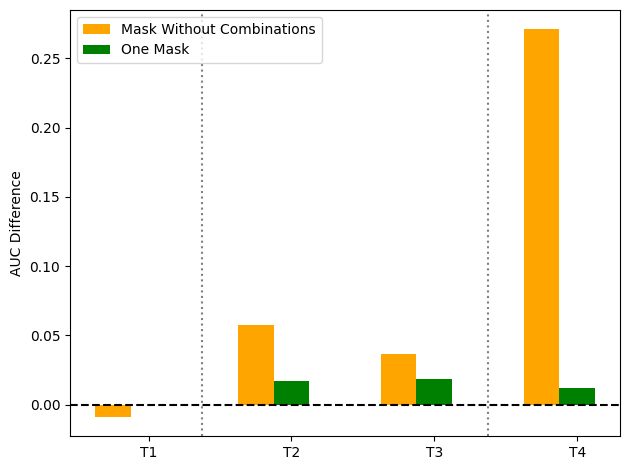

In [11]:
num_values = len(diff_random)
x = np.arange(num_values)

width = 0.25
fig, ax = plt.subplots()

ax.bar(x, diff_random, width, label="Mask Without Combinations", color='orange')
ax.bar(x + width, diff_big_mask, width, label="One Mask", color='green')

# Set x-axis labels for each group
ax.set_xticks(x + width)
ax.set_xticklabels([f'T{i + 1}' for i in range(num_values)])

# Add a horizontal line at y=0
ax.axhline(0, color='black', linestyle='--')
# Add a vertical line to seperate base and complex tasks
ax.axvline(0.625, color='gray', linestyle=':')
ax.axvline(2.625, color='gray', linestyle=':')

# Add legends and labels
ax.legend(loc='upper left')
ax.set_ylabel('AUC Difference')

plt.tight_layout()
plt.savefig("log_safe/comparisons/auc_diff_small.png")
plt.show()

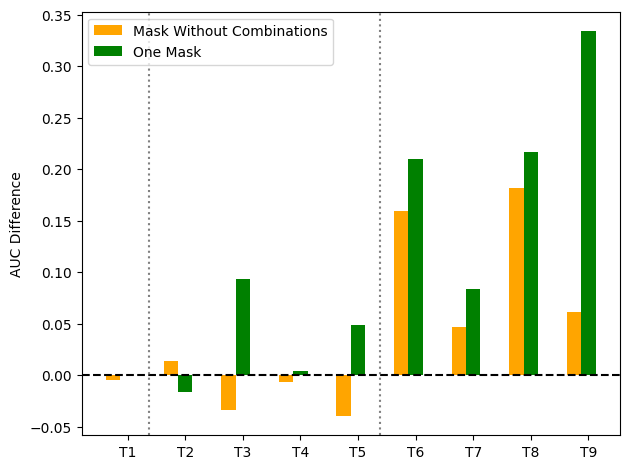

In [12]:
num_values = len(diff_random_all)
x = np.arange(num_values)

width = 0.25
fig, ax = plt.subplots()

ax.bar(x, diff_random_all, width, label="Mask Without Combinations", color='orange')
ax.bar(x + width, diff_big_mask_all, width, label="One Mask", color='green')

# Set x-axis labels for each group
ax.set_xticks(x + width)
ax.set_xticklabels([f'T{i + 1}' for i in range(num_values)])

# Add a horizontal line at y=0
ax.axhline(0, color='black', linestyle='--')
# Add a vertical line to seperate base and complex tasks
ax.axvline(0.625, color='gray', linestyle=':')
ax.axvline(4.625, color='gray', linestyle=':')

# Add legends and labels
ax.legend(loc='upper left')
ax.set_ylabel('AUC Difference')

plt.tight_layout()
plt.savefig("log_safe/comparisons/auc_diff_big.png")
plt.show()

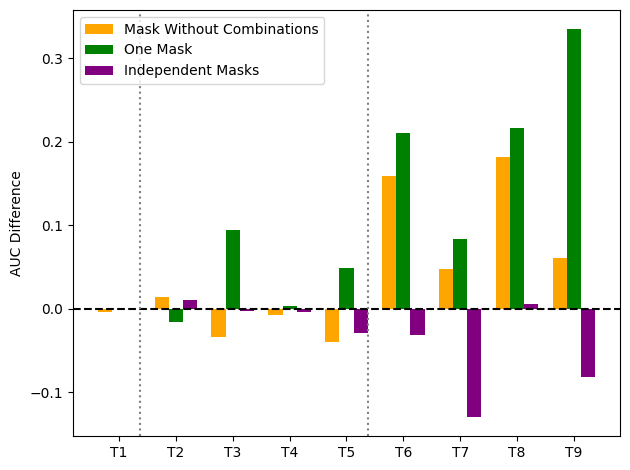

In [13]:
num_values = len(diff_random_all)
x = np.arange(num_values)

width = 0.25
fig, ax = plt.subplots()

ax.bar(x, diff_random_all, width, label="Mask Without Combinations", color='orange')
ax.bar(x + width, diff_big_mask_all, width, label="One Mask", color='green')
ax.bar(x + 2 * width, diff_independent_all, width, label="Independent Masks", color='purple')

# Set x-axis labels for each group
ax.set_xticks(x + width)
ax.set_xticklabels([f'T{i + 1}' for i in range(num_values)])

# Add a horizontal line at y=0
ax.axhline(0, color='black', linestyle='--')
# Add a vertical line to seperate base and complex tasks
ax.axvline(0.625, color='gray', linestyle=':')
ax.axvline(4.625, color='gray', linestyle=':')

# Add legends and labels
ax.legend(loc='upper left')
ax.set_ylabel('AUC Difference')

plt.tight_layout()
plt.savefig("log_safe/comparisons/auc_diff_independent.png")
plt.show()

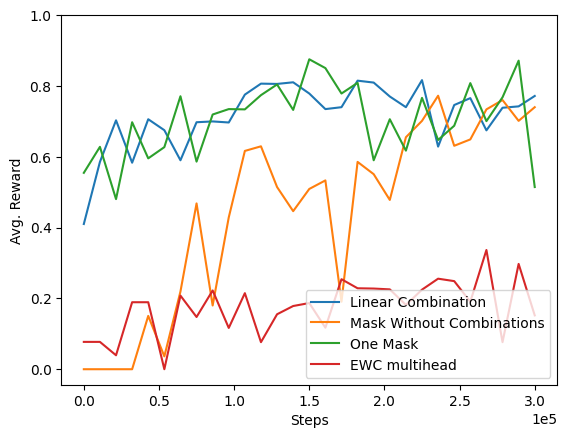

In [24]:
n = 29

comb_values = values_for_task(comb, 3).to_numpy()[:n]
big_mask_values = values_for_task(big_mask, 3).to_numpy()[:n]
random_values = values_for_task(random, 3).to_numpy()[:n]
ewc_values = values_for_task(ewc, 3).to_numpy()[:n]

steps = np.linspace(0, 300000, n)

plt.plot(steps, comb_values, label="Linear Combination")
plt.plot(steps, random_values, label="Mask Without Combinations")
plt.plot(steps, big_mask_values, label="One Mask")
plt.plot(steps, ewc_values, label="EWC multihead")

plt.xlabel("Steps")
plt.ylabel("Avg. Reward")
plt.ylim(top=1)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.legend()
plt.savefig("log_safe/comparisons/plot_small_comp.png")
plt.show()

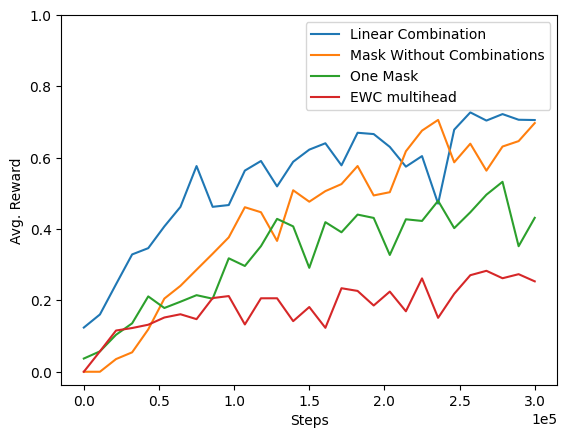

In [92]:
n = 29

comb_all_values = np.zeros((n,))
random_all_values = np.zeros((n,))
big_mask_all_values = np.zeros((n,))
ewc_all_values = np.zeros((n,))
for i in range(5, 9):
    comb_all_values += values_for_task(comb_all, i).to_numpy()[:n]
    random_all_values += values_for_task(random_all, i).to_numpy()[:n]
    big_mask_all_values += values_for_task(big_mask_all, i).to_numpy()[:n]
    ewc_all_values += values_for_task(ewc_all, i).to_numpy()[:n]

comb_all_values /= 4
random_all_values /= 4
big_mask_all_values /= 4
ewc_all_values /= 4

steps = np.linspace(0, 300000, n)

plt.plot(steps, comb_all_values, label="Linear Combination")
plt.plot(steps, random_all_values, label="Mask Without Combinations")
plt.plot(steps, big_mask_all_values, label="One Mask")
plt.plot(steps, ewc_all_values, label="EWC multihead")

plt.xlabel("Steps")
plt.ylabel("Avg. Reward")
plt.ylim(top=1)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.legend()
plt.savefig("log_safe/comparisons/plot_big_comp.png")
plt.show()

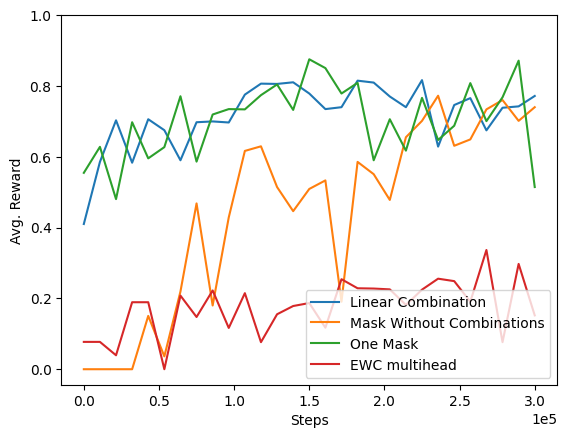

In [7]:
n = 29

comb_values = values_for_task(comb, 3).to_numpy()[:n]
big_mask_values = values_for_task(big_mask, 3).to_numpy()[:n]
random_values = values_for_task(random, 3).to_numpy()[:n]
ewc_values = values_for_task(ewc, 3).to_numpy()[:n]

steps = np.linspace(0, 300000, n)

plt.plot(steps, comb_values, label="Linear Combination")
plt.plot(steps, random_values, label="Mask Without Combinations")
plt.plot(steps, big_mask_values, label="One Mask")
plt.plot(steps, ewc_values, label="EWC multihead")

plt.xlabel("Steps")
plt.ylabel("Avg. Reward")
plt.ylim(top=1)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.legend()
plt.savefig("log_safe/comparisons/plot_small_last_task.png")
plt.show()

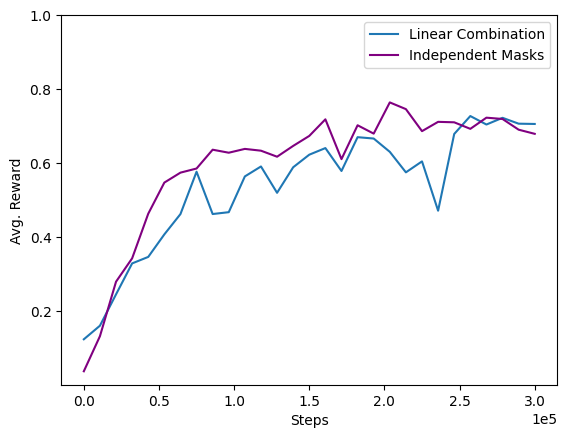

In [93]:
n = 29

comb_all_values = np.zeros((n,))
independent_all_values = np.zeros((n,))
for i in range(5, 9):
    comb_all_values += values_for_task(comb_all, i).to_numpy()[:n]
    independent_all_values += values_for_task(independent_all, i).to_numpy()[:n]

comb_all_values /= 4
independent_all_values /= 4

steps = np.linspace(0, 300000, n)

plt.plot(steps, comb_all_values, label="Linear Combination")
plt.plot(steps, independent_all_values, label="Independent Masks", color='purple')

plt.xlabel("Steps")
plt.ylabel("Avg. Reward")
plt.ylim(top=1)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.legend()
plt.savefig("log_safe/comparisons/plot_independent_comp.png")
plt.show()

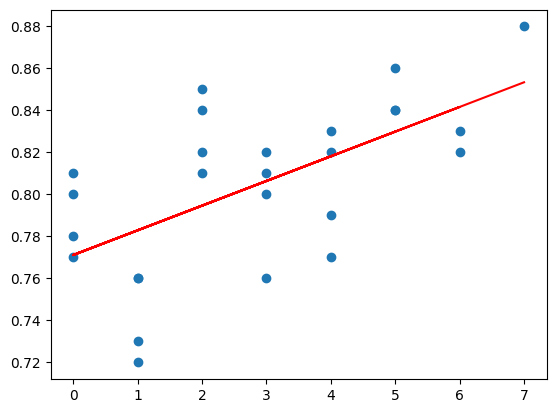

In [20]:
sim_scores = [[0.81,  0.76,  0.82,  0.82,  0.79],
              [0.77, 0.73, 0.81, 0.80, 0.77, 0.84], 
              [0.78, 0.76, 0.85, 0.81, 0.83, 0.86, 0.82], 
              [0.80, 0.72, 0.84, 0.76, 0.82, 0.84, 0.83, 0.88]]

y = []
x = []

for scores in sim_scores:
    y.extend(scores)
    x.extend(np.arange(len(scores)).tolist())

y = np.array(y)
x = np.array(x)

# Calculate linear regression line
slope, intercept = np.polyfit(x, y, 1)
linear_reg_line = slope * x + intercept

# Create scatter plot
plt.scatter(x, y, label='Data Points')

# Plot the linear regression line
plt.plot(x, linear_reg_line, color='red', label='Linear Regression Line')